### Подключим все необходимые библиотеки

In [1]:
import netCDF4 as nc4
from netCDF4 import Dataset,num2date
import numpy as np
import pandas as pd

### Прочитаем наш файл, который мы предварительно скачали

In [30]:
my_nc_file = (r'D:\education\SPBU\My_course\interim_STEP_3.nc') # у вас он сохранится в каком-то другом месте
fh = nc4.Dataset(my_nc_file, mode='r')

### Рассмотрим формат записи размерностей: долготы и широты

In [3]:
fh.variables['longitude'][:], fh.variables['latitude'][:]

(masked_array(data=[27.   , 27.125, 27.25 , 27.375, 27.5  , 27.625, 27.75 ,
                    27.875, 28.   , 28.125, 28.25 , 28.375, 28.5  , 28.625,
                    28.75 , 28.875, 29.   , 29.125, 29.25 , 29.375, 29.5  ,
                    29.625, 29.75 , 29.875, 30.   , 30.125, 30.25 , 30.375,
                    30.5  , 30.625, 30.75 , 30.875, 31.   , 31.125, 31.25 ,
                    31.375, 31.5  , 31.625, 31.75 , 31.875, 32.   ],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=[61.   , 60.875, 60.75 , 60.625, 60.5  , 60.375, 60.25 ,
                    60.125, 60.   , 59.875, 59.75 , 59.625, 59.5  , 59.375,
                    59.25 , 59.125, 59.   , 58.875, 58.75 , 58.625, 58.5  ,
                    58.375, 58.25 , 58.125, 58.   ],
              mask=False,
        fill_value=1e+20,
             dtype=float32))

### С помощью функции argmin найдём индекс с минимальной разницей

In [4]:
col = np.argmin(np.abs(fh.variables['longitude'][:] - 30.1)) # долгота нашей станции
row = np.argmin(np.abs(fh.variables['latitude'][:] - 59.4000)) # широта нашей станции

### Проверим, что вышло

In [5]:
fh.variables['longitude'][col]

masked_array(data=30.125,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

### Для нашей станции прочитаем все параметры, которые нам нравятся

In [6]:
varnames = ['t2m', 'tp']

BELOGORKA_nc = np.ma.getdata([fh.variables[varname][:, row, col] for varname in varnames])

### Это тоже самое

In [7]:
t2m = fh.variables['t2m'][:, row, col]
tp = fh.variables['tp'][:, row, col]
t = fh.variables['time']
dtime = nc4.num2date(t[:], t.units)

fh.close()

### Прочитаем данные, наблюденные на станции

In [8]:
observations = pd.read_csv(r'D:\education\SPBU\My_course\1935499.csv')

C:\Users\dmbrm\Miniconda3\envs\geo\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
observations

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,RSM00026069,"BELOGORKA, RS",59.4000,30.1,90.0,1970-01-01,NaN,NaN,0.6,",,r",NaN,NaN,-9.4,",,r",-6.5,",,r",-15.7,",,r"
1,RSM00026069,"BELOGORKA, RS",59.4000,30.1,90.0,1970-01-02,NaN,NaN,0.7,",,r",NaN,NaN,-13.4,",,r",-8.9,",,r",-18.3,",,r"
2,RSM00026069,"BELOGORKA, RS",59.4000,30.1,90.0,1970-01-03,NaN,NaN,3.7,",,r",NaN,NaN,-7.6,",,r",-7.1,",,r",-9.2,",,r"
3,RSM00026069,"BELOGORKA, RS",59.4000,30.1,90.0,1970-01-04,NaN,NaN,0.4,",,r",NaN,NaN,-5.5,",,r",-4.2,",,r",-8.5,",,r"
4,RSM00026069,"BELOGORKA, RS",59.4000,30.1,90.0,1970-01-05,NaN,NaN,1.7,",,r",NaN,NaN,-4.6,",,r",-2.5,",,r",-7.0,",,r"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54200,RSM00026063,"ST. PETERSBURG, RS",59.9667,30.3,3.0,2019-10-29,NaN,NaN,5.1,"B,,S",10.0,",,S",-0.2,"H,,S",1.4,",,S",NaN,NaN
54201,RSM00026063,"ST. PETERSBURG, RS",59.9667,30.3,3.0,2019-10-30,NaN,NaN,0.0,"B,,S",30.0,",,S",-1.9,"H,,S",-0.2,",,S",NaN,NaN
54202,RSM00026063,"ST. PETERSBURG, RS",59.9667,30.3,3.0,2019-10-31,NaN,NaN,3.0,"B,,S",30.0,",,S",0.0,"H,,S",NaN,NaN,NaN,NaN
54203,RSM00026063,"ST. PETERSBURG, RS",59.9667,30.3,3.0,2019-11-01,NaN,NaN,0.5,"B,,S",NaN,NaN,1.3,"H,,S",NaN,NaN,NaN,NaN


### Если выкидывать столбцы с пропусками - данных вообще не останется

In [10]:
observations.dropna(axis='columns')

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE
0,RSM00026069,"BELOGORKA, RS",59.4000,30.1,90.0,1970-01-01
1,RSM00026069,"BELOGORKA, RS",59.4000,30.1,90.0,1970-01-02
2,RSM00026069,"BELOGORKA, RS",59.4000,30.1,90.0,1970-01-03
3,RSM00026069,"BELOGORKA, RS",59.4000,30.1,90.0,1970-01-04
4,RSM00026069,"BELOGORKA, RS",59.4000,30.1,90.0,1970-01-05
...,...,...,...,...,...,...
54200,RSM00026063,"ST. PETERSBURG, RS",59.9667,30.3,3.0,2019-10-29
54201,RSM00026063,"ST. PETERSBURG, RS",59.9667,30.3,3.0,2019-10-30
54202,RSM00026063,"ST. PETERSBURG, RS",59.9667,30.3,3.0,2019-10-31
54203,RSM00026063,"ST. PETERSBURG, RS",59.9667,30.3,3.0,2019-11-01


### Воспользуемся логическим индексированием и выберем только конкретные столбцы

In [11]:
observations = observations[['NAME', 'DATE', 'PRCP', 'TAVG']]

In [12]:
observations

,NAME,DATE,PRCP,TAVG
0,"BELOGORKA, RS",1970-01-01,0.6,-9.4
1,"BELOGORKA, RS",1970-01-02,0.7,-13.4
2,"BELOGORKA, RS",1970-01-03,3.7,-7.6
3,"BELOGORKA, RS",1970-01-04,0.4,-5.5
4,"BELOGORKA, RS",1970-01-05,1.7,-4.6
...,...,...,...,...
54200,"ST. PETERSBURG, RS",2019-10-29,5.1,-0.2
54201,"ST. PETERSBURG, RS",2019-10-30,0.0,-1.9
54202,"ST. PETERSBURG, RS",2019-10-31,3.0,0.0
54203,"ST. PETERSBURG, RS",2019-11-01,0.5,1.3


### Посмотрим сколько у нас всего пропусков. Сравним с длиной наблюдений

In [13]:
sum(observations.PRCP.isna()), len(observations.PRCP)

(4147, 54205)

### Определим уникальные переменные в столбце имён

In [14]:
observations.NAME.unique()

array(['BELOGORKA, RS', 'KINGISEPP, RS', 'ST. PETERSBURG, RS'],
      dtype=object)

### Опять логическое индексирование. Выберем данные только для Белогорки

In [15]:
observations[observations.NAME == 'BELOGORKA, RS']

,NAME,DATE,PRCP,TAVG
0,"BELOGORKA, RS",1970-01-01,0.6,-9.4
1,"BELOGORKA, RS",1970-01-02,0.7,-13.4
2,"BELOGORKA, RS",1970-01-03,3.7,-7.6
3,"BELOGORKA, RS",1970-01-04,0.4,-5.5
4,"BELOGORKA, RS",1970-01-05,1.7,-4.6
...,...,...,...,...
17892,"BELOGORKA, RS",2019-10-29,2.0,-1.1
17893,"BELOGORKA, RS",2019-10-30,0.3,-2.6
17894,"BELOGORKA, RS",2019-10-31,0.3,-1.6
17895,"BELOGORKA, RS",2019-11-01,2.3,1.1


In [16]:
observations_Belogorka = observations[observations.NAME == 'BELOGORKA, RS'] 
observations_SPB = observations[observations.NAME == 'ST. PETERSBURG, RS'] 
observations_KINGISEP = observations[observations.NAME == 'KINGISEPP, RS']

In [17]:
sum(observations_KINGISEP.PRCP.isna())

4129

### Выбираем нужный промежуток наблюдений

In [18]:
observations_Belogorka.DATE >= '1979-01-01'

0        False
1        False
2        False
3        False
4        False
         ...  
17892     True
17893     True
17894     True
17895     True
17896     True
Name: DATE, Length: 17897, dtype: bool

### "Магическая функция", которая позволяет отображать график сразу после ввода команды

In [19]:
%matplotlib inline

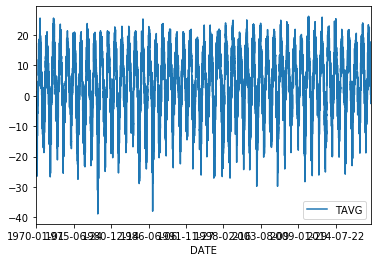

In [20]:
observations_Belogorka.plot(x = 'DATE', y = 'TAVG')

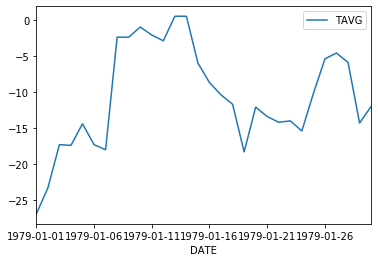

In [21]:
observations_Belogorka[(observations_Belogorka.DATE >= '1979-01-01') & (observations_Belogorka.DATE <= '1979-01-30')].plot(x = 'DATE', y = 'TAVG')

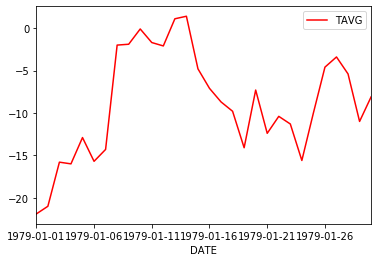

In [22]:
observations_SPB[(observations_SPB.DATE >= '1979-01-01') & (observations_SPB.DATE <= '1979-01-30')].plot(x = 'DATE', y = 'TAVG', color = 'red')

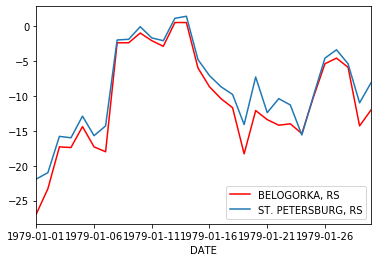

In [23]:
import matplotlib.pyplot as plt

ax = plt.gca()

observations_Belogorka[(observations_Belogorka.DATE >= '1979-01-01') & (observations_Belogorka.DATE <= '1979-01-30')].plot(x = 'DATE', y = 'TAVG', color = 'red', ax = ax)
observations_SPB[(observations_SPB.DATE >= '1979-01-01') & (observations_SPB.DATE <= '1979-01-30')].plot(x = 'DATE', y = 'TAVG', ax = ax)

labels = [observations_Belogorka.NAME.unique()[0], observations_SPB.NAME.unique()[0]]

plt.legend(labels,loc='lower right')

### Функция для определения среднего за N сроков наблюдений

In [24]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    t = (cumsum[N:] - cumsum[:-N]) / float(N)
    return t[::N]

In [25]:
test = observations_Belogorka[(observations_Belogorka.DATE >= '1979-01-01') & (observations_Belogorka.DATE <= '1979-01-30')]

In [40]:
test['t2m'] = running_mean(t2m, 2)
test['tp'] = running_mean(tp, 2)

C:\Users\dmbrm\Miniconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dmbrm\Miniconda3\envs\geo\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
test.t2m = test.t2m - 273.15
test.tp = test.tp * 10**4

In [35]:
test

,NAME,DATE,PRCP,TAVG,t2m,tp
3287,"BELOGORKA, RS",1979-01-01,0.0,-26.9,-27.174730,0.001631
3288,"BELOGORKA, RS",1979-01-02,1.1,-23.3,-20.693967,0.207358
3289,"BELOGORKA, RS",1979-01-03,5.9,-17.3,-17.119139,1.017836
3290,"BELOGORKA, RS",1979-01-04,0.6,-17.4,-16.287688,0.142277
3291,"BELOGORKA, RS",1979-01-05,6.7,-14.4,-13.300325,0.241815
3292,"BELOGORKA, RS",1979-01-06,0.0,-17.3,-15.680385,0.004151
3293,"BELOGORKA, RS",1979-01-07,1.4,-18.0,-14.381093,0.141303
3294,"BELOGORKA, RS",1979-01-08,4.1,-2.4,-1.871417,1.171485
3295,"BELOGORKA, RS",1979-01-09,0.5,-2.4,-2.016507,0.215469
3296,"BELOGORKA, RS",1979-01-10,4.1,-1.0,-0.870596,0.758019


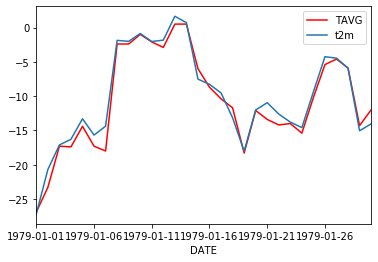

In [36]:
ax = plt.gca()

test.plot(x = 'DATE', y = 'TAVG', color = 'red', ax = ax)
test.plot(x = 'DATE', y = 't2m', ax = ax)

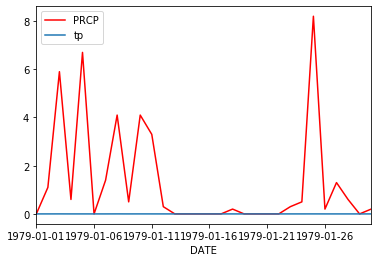

In [41]:
ax = plt.gca()

test.plot(x = 'DATE', y = 'PRCP', color = 'red', ax = ax)
test.plot(x = 'DATE', y = 'tp', ax = ax)